### Using Random Forest Model to Do Feature Importance

[0.00746477 0.00973399 0.46739411 0.51540713]
[0 1 2 3]
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


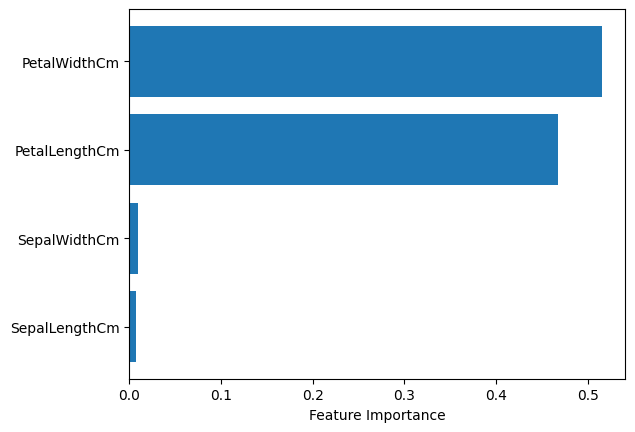

In [11]:
# Loading Dataset
import pandas as pd
dataset = pd.read_csv('../datasets/Iris.csv')
dataset = dataset.drop('Id',axis=1)

# Convert target variable (Species) as category
dataset.Species = dataset.Species.astype('category')

# Placing converted values to Species column
dataset.Species = dataset.Species.cat.codes

# Split-out test dataset
from sklearn import model_selection
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Using StandardScalar function to scale all numarical variables
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
X_train[:5]

# Use Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

sort = rf.feature_importances_.argsort()
print(rf.feature_importances_)
print(sort)
print(dataset.columns[sort])

# Visualize it
from matplotlib import pyplot as plt

plt.barh(dataset.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.show()